In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve,f1_score, plot_confusion_matrix, plot_roc_curve

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

import RssUtils

%matplotlib inline

In [3]:
dfRaw = pd.read_csv("data/dfImputed.csv").set_index('Unnamed: 0')
dfRaw.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [19]:
def plotDF(df):
    plt.figure(figsize=(9,6))
    fig, axs = plt.subplots(2,5)
    axs[0,0].boxplot(df.RevolvingUtilizationOfUnsecuredLines)
    axs[0,1].boxplot(df.age)
    axs[0,2].boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'])

    axs[0,3].boxplot(df.DebtRatio)
    axs[0,4].boxplot(df.MonthlyIncome)

    axs[1,0].boxplot(df.NumberOfOpenCreditLinesAndLoans)
    axs[1,1].boxplot(df.NumberOfTimes90DaysLate)
    axs[1,2].boxplot(df.NumberRealEstateLoansOrLines)
    axs[1,3].boxplot(df['NumberOfTime60-89DaysPastDueNotWorse'])
    axs[1,4].boxplot(df.NumberOfDependents)
    fig.tight_layout()
    plt.show()

<Figure size 648x432 with 0 Axes>

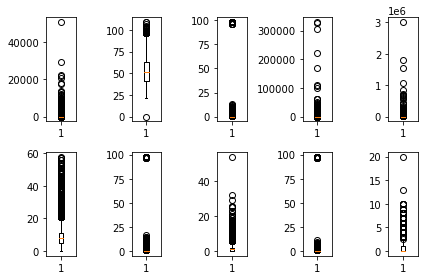

In [20]:
plotDF(dfRaw)

In [21]:
dfcopy = dfRaw.copy().drop(columns=['SeriousDlqin2yrs'])

<Figure size 648x432 with 0 Axes>

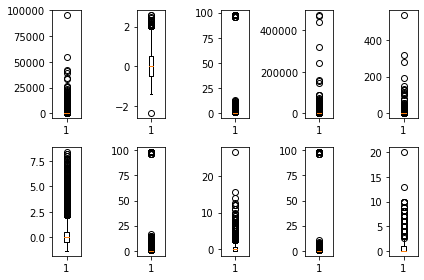

In [27]:
dfScaled = pd.DataFrame(RobustScaler(()).fit_transform(dfcopy), columns=dfcopy.columns)

plotDF(dfScaled)

<Figure size 648x432 with 0 Axes>

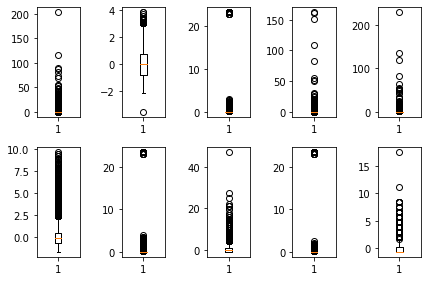

In [28]:
dfScaled = pd.DataFrame(StandardScaler().fit_transform(dfcopy), columns=dfcopy.columns)

plotDF(dfScaled)

<Figure size 648x432 with 0 Axes>

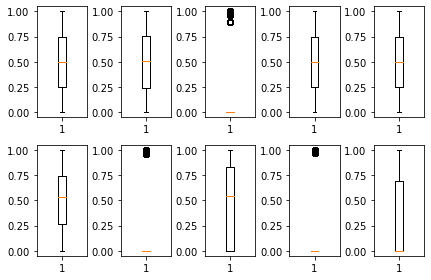

In [29]:
dfScaled = pd.DataFrame(QuantileTransformer().fit_transform(dfcopy), columns=dfcopy.columns)

plotDF(dfScaled)

<Figure size 648x432 with 0 Axes>

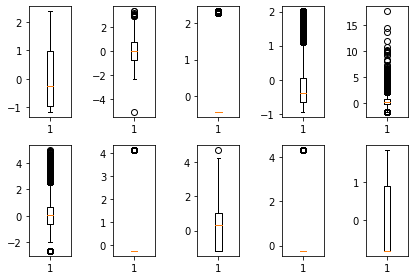

In [32]:
dfScaled = pd.DataFrame(PowerTransformer().fit_transform(dfcopy), columns=dfcopy.columns)

plotDF(dfScaled)